# Install requirements

In [1]:
!pip install sklearn pandas
!pip install prettytable
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post5-py3-none-any.whl size=2950 sha256=50e239c8b816662e7456c9c9126bb4ba2e1b8638af5fa4ea6401411ee9bccfd7
  Stored in directory: /root/.cache/pip/wheels/38/1f/8d/4f812c590e074c1e928f5cec67bf5053b71f38e2648739403a
Successfully built sklearn
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Read dataset

In [2]:
import pandas as pd
from google.colab import drive
drive = drive.mount('/content/drive')

Mounted at /content/drive


In [3]:

from prettytable import PrettyTable
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV


In [4]:
test_features = pd.read_csv("/content/drive/MyDrive/new_df/test_set.csv")
train_features = pd.read_csv("/content/drive/MyDrive/new_df/train_set.csv")
test_target = pd.read_csv("/content/drive/MyDrive/new_df/test_set_NB.csv")
train_target = pd.read_csv("/content/drive/MyDrive/new_df/train_set_NB.csv")

# Call **Random Fores**t from `sklearn`

In [23]:
print('Random forest')
from sklearn.ensemble import RandomForestClassifier

head = PrettyTable(['max_depth', 'max_node', 'random_state', 'n_estimatorsint', 'criterion', 'confusion_matrix', 'f1_score_micro_test', 'f1_score_micro_train'])

f1_score_micro_test_array = []
f1_score_micro_train_array = []

max_depth_range = list(range(14,16))
max_node_range = [2,10,20,30,40,50,60,70,80,90,98]

for depth in max_depth_range:
  for node in max_node_range:
    '''Create random forest classifier'''
    model1 = RandomForestClassifier(n_estimators=100 , max_depth = depth, max_leaf_nodes = node, min_samples_split=2, random_state =50)
    model2 = RandomForestClassifier(n_estimators=60 , max_depth = depth, max_leaf_nodes = node, min_samples_split=2,  random_state = 50)

    '''Train and test'''
    model1.fit(train_features, train_target)
    model2.fit(train_features, train_target)

    preds_test1 = model1.predict(test_features)
    preds_test2 = model2.predict(test_features)

    preds_train1 = model1.predict(train_features)
    preds_train2 = model2.predict(train_features)

    cr1 = confusion_matrix(test_target, preds_test1)
    cr2 = confusion_matrix(test_target, preds_test2)

    from sklearn.metrics import f1_score

    f1_micro_test1 = f1_score(test_target, preds_test1, average = 'micro')
    f1_micro_test2 = f1_score(test_target, preds_test2, average = 'micro')

    f1_micro_train1 = f1_score(train_target, preds_train1, average = 'micro')
    f1_micro_train2 = f1_score(train_target, preds_train2, average = 'micro')

    f1_score_micro_test1 = "%.2f"%round(f1_micro_test1, 2)
    f1_score_micro_test2 = "%.2f"%round(f1_micro_test2, 2)

    f1_score_micro_train1 = "%.2f"%round(f1_micro_train1, 2)
    f1_score_micro_train2 = "%.2f"%round(f1_micro_train2, 2)

    f1_score_micro_test_array.append(f1_score_micro_test1)
    f1_score_micro_test_array.append(f1_score_micro_test2)
    f1_score_micro_train_array.append(f1_score_micro_train1)
    f1_score_micro_train_array.append(f1_score_micro_train2)

    head.add_row([depth, node, '0', '80', 'gini', cr1, f1_score_micro_test1, f1_score_micro_train1])
    head.add_row([depth, node, '90', '20', 'entropy', cr2, f1_score_micro_test2, f1_score_micro_train2])
print(head)

Random forest


<ipython-input-23-f06bfa140021>:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model1.fit(train_features, train_target)
<ipython-input-23-f06bfa140021>:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model2.fit(train_features, train_target)
<ipython-input-23-f06bfa140021>:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model1.fit(train_features, train_target)
<ipython-input-23-f06bfa140021>:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model2.fit(train_features, train_target)
<ipython-input-23-f06bfa140021>:19: DataConversionWarning: A col

+-----------+----------+--------------+-----------------+-----------+--------------------+---------------------+----------------------+
| max_depth | max_node | random_state | n_estimatorsint | criterion |  confusion_matrix  | f1_score_micro_test | f1_score_micro_train |
+-----------+----------+--------------+-----------------+-----------+--------------------+---------------------+----------------------+
|     14    |    2     |      0       |        80       |    gini   | [[1371   85  586]  |         0.43        |         0.40         |
|           |          |              |                 |           |  [ 820   46  461]  |                     |                      |
|           |          |              |                 |           |  [ 387   30  389]] |                     |                      |
|     14    |    2     |      90      |        20       |  entropy  | [[1338   66  638]  |         0.43        |         0.40         |
|           |          |              |         

In [22]:

model = RandomForestClassifier(n_estimators=60, max_depth= 15, max_leaf_nodes=70, random_state = 50)

model.fit(train_features, train_target)
preds_test = model.predict(test_features)
preds_train = model.predict(train_features)

<ipython-input-22-40c1d6b2ff09>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(train_features, train_target)


Report for test set:

               precision    recall  f1-score   support

     class 0       0.57      0.55      0.56      2042
     class 1       0.33      0.26      0.29      1327
     class 2       0.34      0.50      0.41       806

    accuracy                           0.45      4175
   macro avg       0.42      0.44      0.42      4175
weighted avg       0.45      0.45      0.44      4175



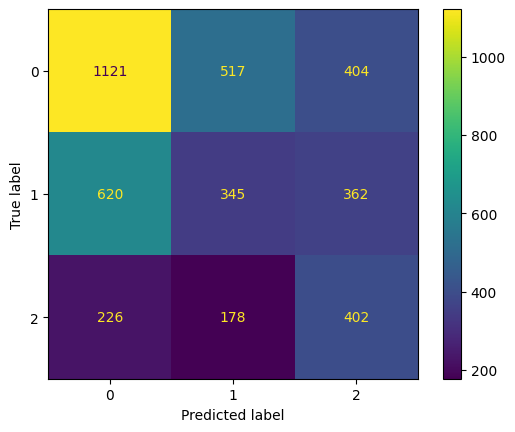

-------------------------------------------------------
Report for train set:

               precision    recall  f1-score   support

     class 0       0.47      0.57      0.51      8164
     class 1       0.51      0.38      0.44      8164
     class 2       0.61      0.63      0.62      8164

    accuracy                           0.53     24492
   macro avg       0.53      0.53      0.52     24492
weighted avg       0.53      0.53      0.52     24492



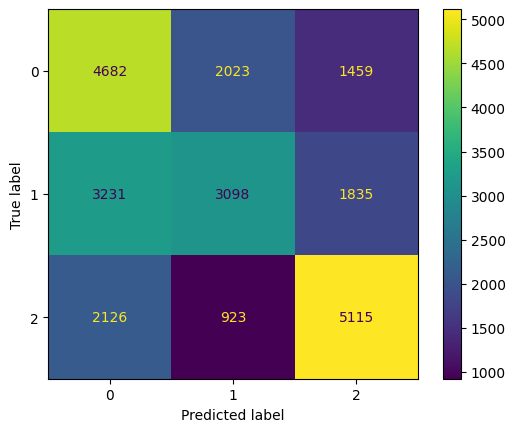

In [20]:
import numpy
target_names = ['class 0', 'class 1', 'class 2']

print("Report for test set:\n\n", classification_report(test_target, numpy.round(preds_test), target_names=target_names))
test_confusion_matrix = confusion_matrix(test_target, numpy.round(preds_test))
test_disp = ConfusionMatrixDisplay(confusion_matrix=test_confusion_matrix, display_labels=['0', '1', '2'])
test_disp.plot()
plt.show()
print("-------------------------------------------------------")
print("Report for train set:\n\n", classification_report(train_target, numpy.round(preds_train), target_names=target_names))
train_confusion_matrix = confusion_matrix(train_target, numpy.round(preds_train))
train_disp = ConfusionMatrixDisplay(confusion_matrix=train_confusion_matrix, display_labels=['0', '1', '2'])
train_disp.plot()
plt.show()

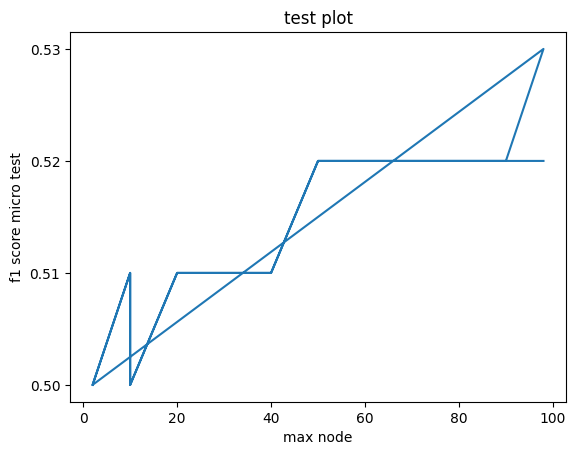

In [ ]:
max_node_array = [2,2,10,10,20,20,30,30,40,40,50,50,60,60,70,70,80,80,90,90,98,98,2,2,10,10,20,20,30,30,40,40,50,50,60,60,70,70,80,80,90,90,98,98]
plt.plot(max_node_array, f1_score_micro_test_array)
plt.xlabel('max node')
plt.ylabel('f1 score micro test')
plt.title('test plot')
plt.show()

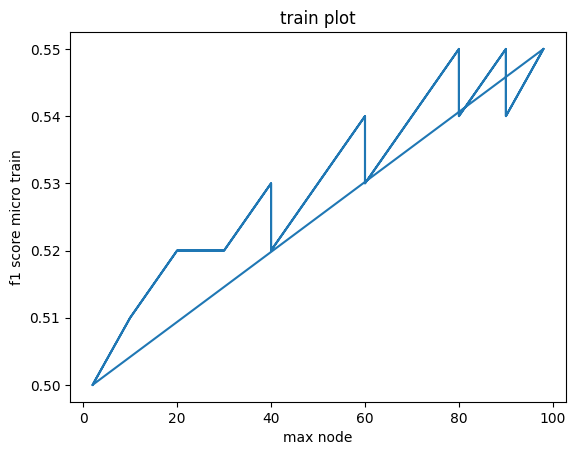

In [ ]:
max_node_array = [2,2,10,10,20,20,30,30,40,40,50,50,60,60,70,70,80,80,90,90,98,98,2,2,10,10,20,20,30,30,40,40,50,50,60,60,70,70,80,80,90,90,98,98]
plt.plot(max_node_array, f1_score_micro_train_array)
plt.xlabel('max node')
plt.ylabel('f1 score micro train')
plt.title('train plot')
plt.show()